# Clasificador de Imagenes - Alien vs Predator

Realizaremos un clasificador sencillo de imagenes utilizando redes neuronales y el modelo de estado del arte VGG16



Primero vincularemos nuestra carpeta de google drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


Seguido, luego de vincularla cambiaremos la carpeta de ejemplo

In [2]:
import os

os.chdir('../gdrive/My Drive/Alien vs Predator')

Algunos imports basicos para tratamiento del notebook

In [3]:
from os import listdir
from numpy import save
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Input
from matplotlib.image import imread
from matplotlib import pyplot
from numpy import asarray
import numpy as np

Graficaremos el folder de aliens y depredadores, las 9 primeras imagenes

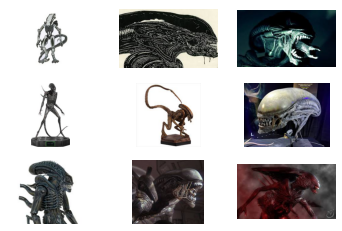

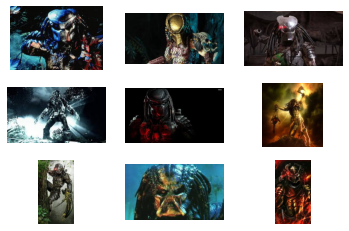

In [4]:
# graficando imagenes de aliens y depredadors

# define folder del dataset
list_of_creatures = ['alien', 'predator']
# plot first few images
for creature in list_of_creatures:
    folder = os.path.join('train', creature)
    for i in range(9):
        # definimos la grafica
        pyplot.axis('off')
        pyplot.subplot(330 + 1 + i)
        # cargamos la imagen
        filename = os.path.join(folder, str(i) + '.jpg')
        image = imread(filename)
        # graficamos
        pyplot.imshow(image)
    # mostramos las figuras
    pyplot.axis('off')    
    pyplot.show()

Seguidamente crearemos instancias para generar más imagenes debido a que el dataset es reducido

In [5]:
# Aumentando el Dataset
# Creando el generador
train_gen = ImageDataGenerator(rescale=1.0/255, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
valid_gen = ImageDataGenerator(rescale=1.0/255)
# Preparación para generacion de imagenes sobre el predictor
train_it = train_gen.flow_from_directory('train/', class_mode='binary', batch_size=64, target_size=(128, 128))
val_it = valid_gen.flow_from_directory('validation/', class_mode='binary', batch_size=64, target_size=(128, 128))
# Confirmando que funciona el iterador
batchX, batchy = train_it.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))


Found 694 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Batch shape=(64, 128, 128, 3), min=0.000, max=1.000


Creacion del modelo de red neuronal VGG16

In [7]:
def get_model():
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', data_format="channels_last", input_shape=(128, 128, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(64, (3, 3),  activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))    
    
    model.add(Conv2D(128, (3, 3),  activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(256, (3, 3),  activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))  

    model.add(Conv2D(512, (3, 3),  activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(512, (3, 3),  activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(128,  activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))

    # Compilacion del modelo
    opt = Adam(lr=0.001)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

Uso del modelo

In [8]:
# Creacion del modelo
model = get_model()
# Resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       7

Grabamos el historial de entrenamiento para graficar

In [9]:
history = model.fit(train_it, steps_per_epoch=len(train_it), 
                    validation_data=val_it, validation_steps=len(val_it), 
                    epochs=200, verbose=1)

Epoch 1/200
11/11 [==============================] - 192s 17s/step - loss: 3.4285 - accuracy: 0.4841 - val_loss: 0.6944 - val_accuracy: 0.5000
Epoch 2/200
11/11 [==============================] - 4s 330ms/step - loss: 0.7092 - accuracy: 0.4813 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 3/200
11/11 [==============================] - 4s 326ms/step - loss: 0.6908 - accuracy: 0.5000 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 4/200
11/11 [==============================] - 4s 330ms/step - loss: 0.6917 - accuracy: 0.5187 - val_loss: 0.6903 - val_accuracy: 0.5050
Epoch 5/200
11/11 [==============================] - 4s 329ms/step - loss: 0.6888 - accuracy: 0.5418 - val_loss: 0.6865 - val_accuracy: 0.5550
Epoch 6/200
11/11 [==============================] - 4s 333ms/step - loss: 0.6790 - accuracy: 0.5778 - val_loss: 0.6720 - val_accuracy: 0.6000
Epoch 7/200
11/11 [==============================] - 4s 330ms/step - loss: 0.6724 - accuracy: 0.5965 - val_loss: 0.6762 - val_accuracy: 0.5300

Graficamos los datos de training y test

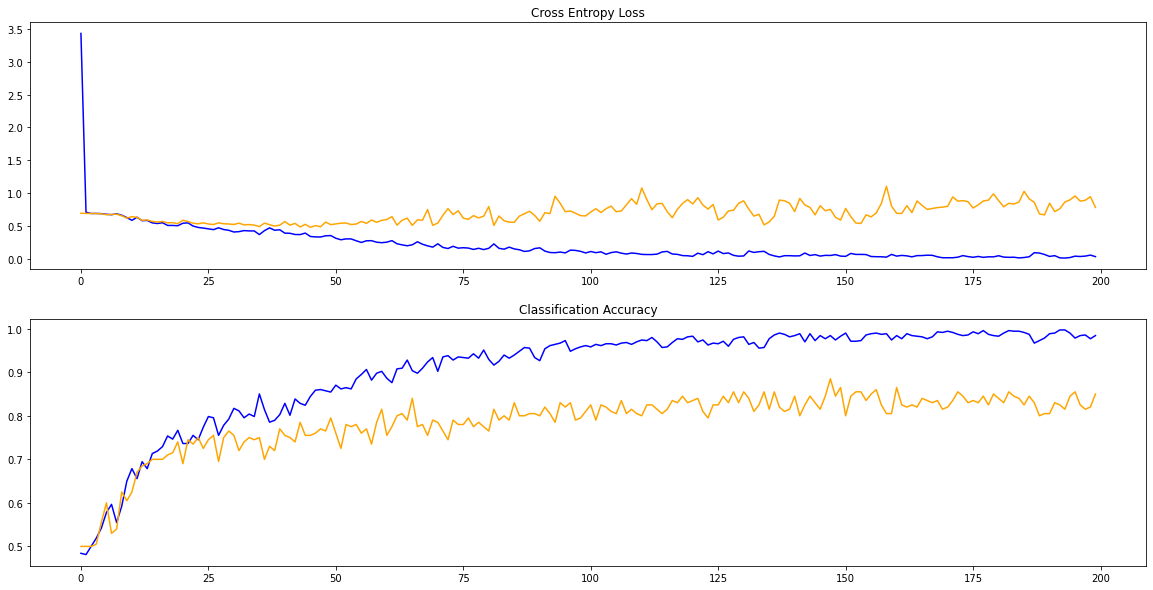

In [10]:
pyplot.figure(figsize=(20,10))
# Graficando pérdida
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='valid')
# Graficando precision
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='valid')
pyplot.show()

Salvamos el modelo

In [11]:
model.save("model.h5")

Como prueba veremos si lo podemos cargar solamente

In [12]:
model = load_model('model.h5')

El siguiente código carga una imagen del disco para prediccion

In [13]:
# Carga y prepara la imagen
def load_image(filename):
    # Carga la imagen del disco
    img = load_img(filename, target_size=(128, 128))
    pyplot.imshow(img)
    # Convierte en arreglo
    img = img_to_array(img)
    # Expande en 1 arreglo unico
    img = np.expand_dims(img, 0)
    return img

El siguiente codigo corre un predictor

In [14]:
# load an image and predict the class
def run_example(img, model):
    # Carga la imagen
    img = load_image(img)
    # Predice la clase
    result = model.predict(img)
    label = 'Predator'
    if result[0] == 0:
      label = 'Alien'
    print(f'This is a(n) {label}')

Probamos nuestras predicciones

This is a(n) Alien


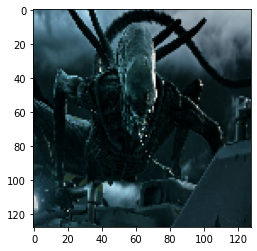

In [15]:
image = 'alien.jpg'
run_example(image, model)

This is a(n) Predator


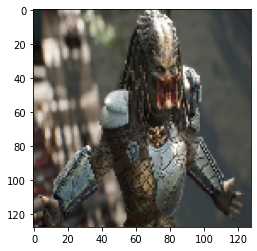

In [16]:
image = 'predator.jpg'
run_example(image, model)